### Charger et préparer les données du dataset


In [ ]:
import sys
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from tensorflow.keras.applications.vgg16 import VGG16
warnings.filterwarnings("ignore", category=UndefinedMetricWarning) # ignorer les warnings
sys.path.insert(0, '../') # specifier le chemin d'acces au dossier parent pour importer Utils
from Utils.dataset_overview import create_data_generator
import matplotlib.pyplot as plt

# path des datasets
train_dir = './dataset/train'
test_dir = './dataset/test'
val_dir = './dataset/val'

# config initiale
seed = 42
batch_size = 32
color_mode = 'rgb'
base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet') # initialiser VGG16

# ordre des classes
class_order = ['normal', 'virus', 'bacteria']

# ster les générateurs d'images
train_generator = create_data_generator(train_dir, batch_size, color_mode, seed,  True, classes=class_order)  # mélanger
test_generator = create_data_generator(test_dir, batch_size, color_mode, seed, False, classes=class_order)   # garde l'ordre
val_generator = create_data_generator(val_dir, batch_size, color_mode, seed, False, classes=class_order)     # garde l'ordre

# récupérer les images et les labels du générateur de train
data, labels = next(train_generator)

print("📁 index des classes détectées :", train_generator.class_indices)

Found 5141 images belonging to 3 classes.
Found 616 images belonging to 3 classes.
Found 99 images belonging to 3 classes.
📁 index des classes détectées : {'normal': 0, 'virus': 1, 'bacteria': 2}


### Visualiser les formes avec Shape

In [2]:
from Utils import print_shapes_and_labels
print_shapes_and_labels(train_generator)
print_shapes_and_labels(val_generator)
print_shapes_and_labels(test_generator)


Images : (32, 224, 224, 3)
Labels : (32, 3)

Images : (32, 224, 224, 3)
Labels : (32, 3)

Images : (32, 224, 224, 3)
Labels : (32, 3)


### Afficher le ratio des classes de poumons dans chaque dataset 
Nombre d’images et répartition des classes par dataset (train, validation et test)

Train : {'nb normal': 1316, 'nb bacteria': 2505, 'nb virus': 1320}
Val : {'nb normal': 33, 'nb bacteria': 33, 'nb virus': 33}
Test : {'nb normal': 234, 'nb bacteria': 242, 'nb virus': 140}


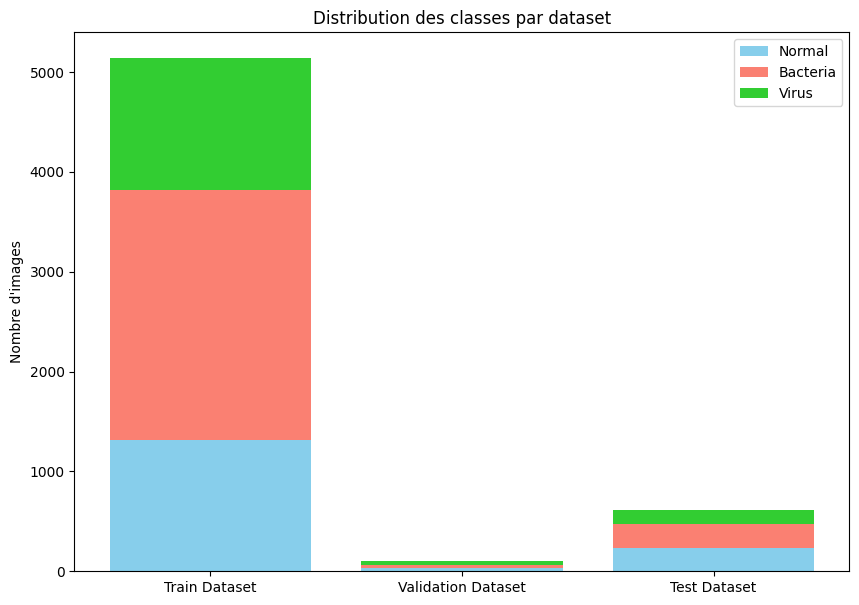

In [3]:
from Utils import get_nb_img_by_classes, plot_stacked_bar_chart

base_dirs = {
    'train dataset': train_dir,
    'val dataset': val_dir,
    'test dataset': test_dir
}
titles = ['Train Dataset', 'Validation Dataset', 'Test Dataset']

train_counts = get_nb_img_by_classes(train_dir)
val_counts = get_nb_img_by_classes(val_dir)
test_counts = get_nb_img_by_classes(test_dir)

train_graph = get_nb_img_by_classes(train_dir)
val_graph = get_nb_img_by_classes(val_dir)
test_graph = get_nb_img_by_classes(test_dir)

print("Train :", train_counts)
print("Val :", val_counts)
print("Test :", test_counts)

plot_stacked_bar_chart(base_dirs, titles)

### Visualiser les données

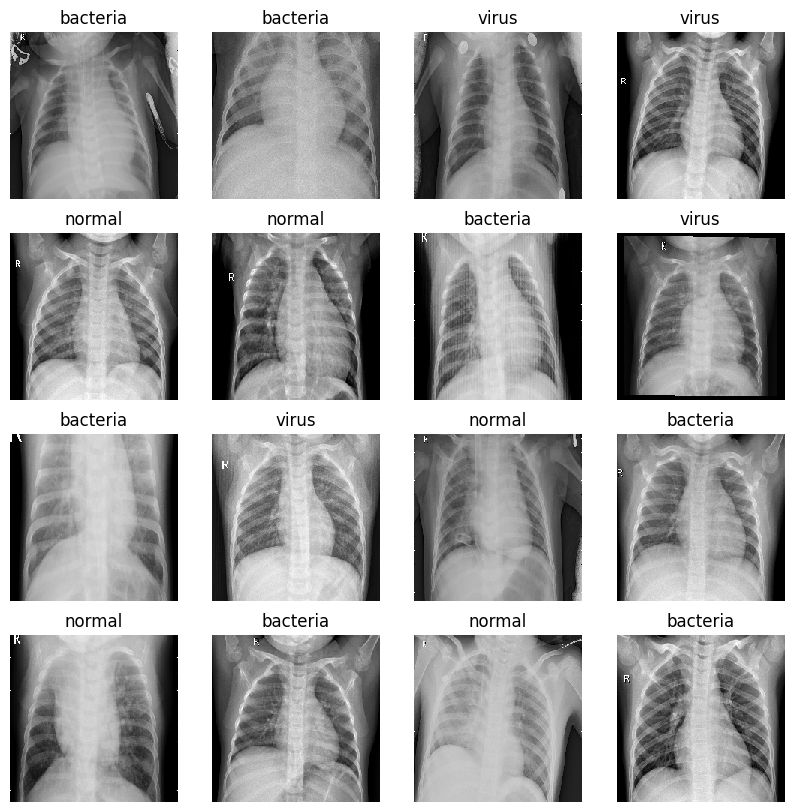

In [4]:
from Utils import get_class_names, plot_4_by_4_images

# obtenir les noms de classe à partir de train_generator.class_indices
class_indices = train_generator.class_indices
class_names = get_class_names(class_indices)
# charger un lot d'images de train
images, labels = next(train_generator)

# utiliser la fonction plot_4_by_4_images pour afficher la grille d'images
plot_4_by_4_images(images, labels, class_names)

